# **Import Librarys**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# **Load Dataset**

In [21]:
# Load the dataset
repurchase_df = pd.read_csv("repurchase_dataset.csv")

# **Data Preprocessing**

In [23]:
# Handling missing values
repurchase_df.fillna(0, inplace=True)

# Convert categorical features to strings
categorical_cols = repurchase_df.select_dtypes(include=['object']).columns
repurchase_df[categorical_cols] = repurchase_df[categorical_cols].astype(str)

# Splitting features and target variable
X = repurchase_df.drop(['Target', 'ID'], axis=1)  # Features
y = repurchase_df['Target']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Full preprocessing pipeline
preprocessed_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the training data
X_train_preprocessed = preprocessed_pipeline.fit_transform(X_train)

# Preprocess the testing data
X_test_preprocessed = preprocessed_pipeline.transform(X_test)


# **Summary statistics**

In [24]:
# Display basic information about the dataset
print(repurchase_df.info())

# Summary statistics for numerical variables
print(repurchase_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   131337 non-null  object
 3   gender                     131337 non-null  object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

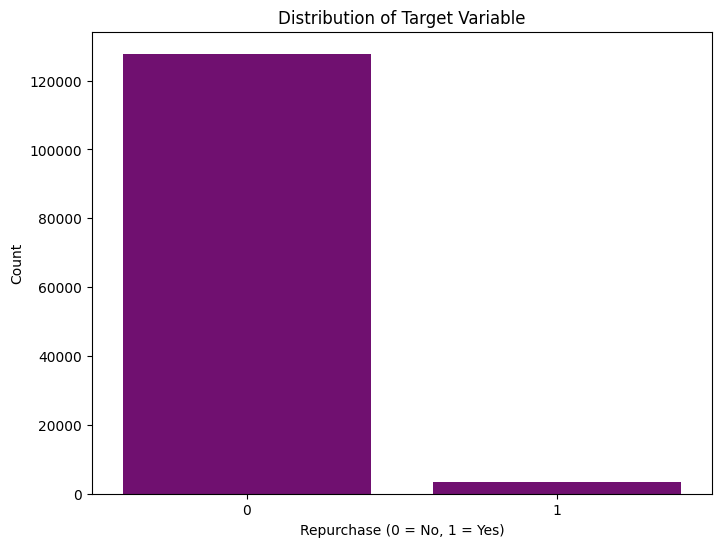

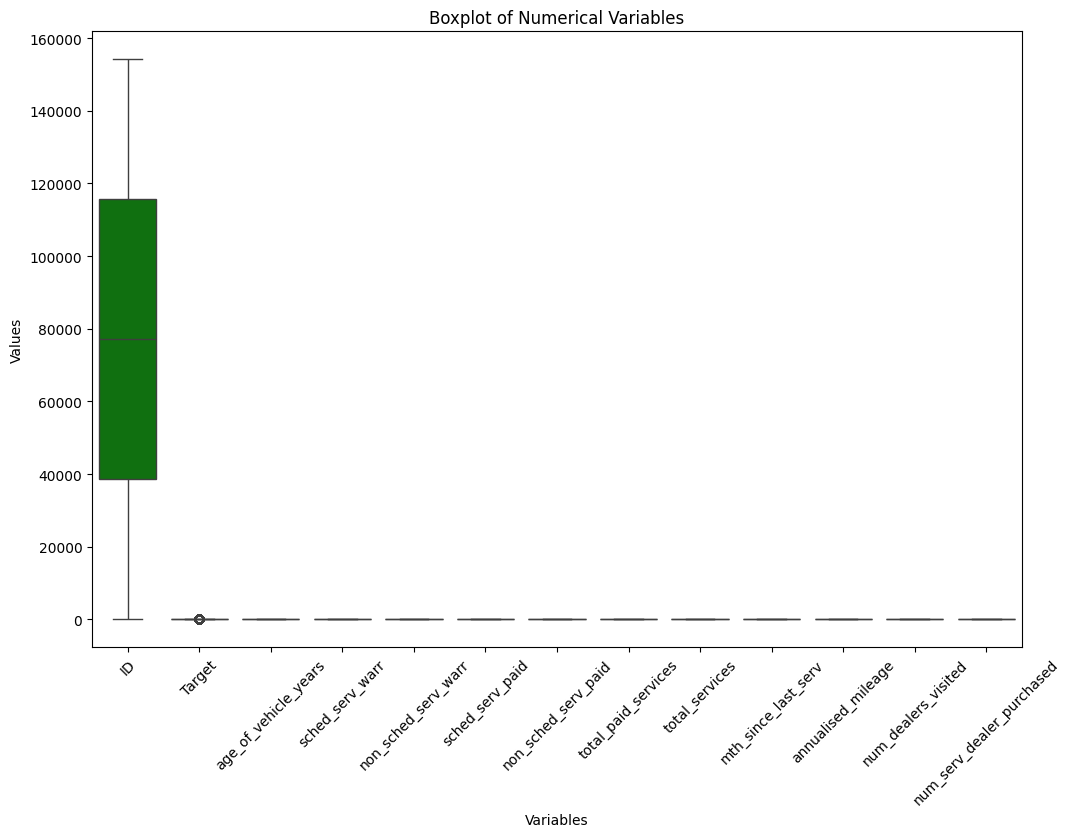

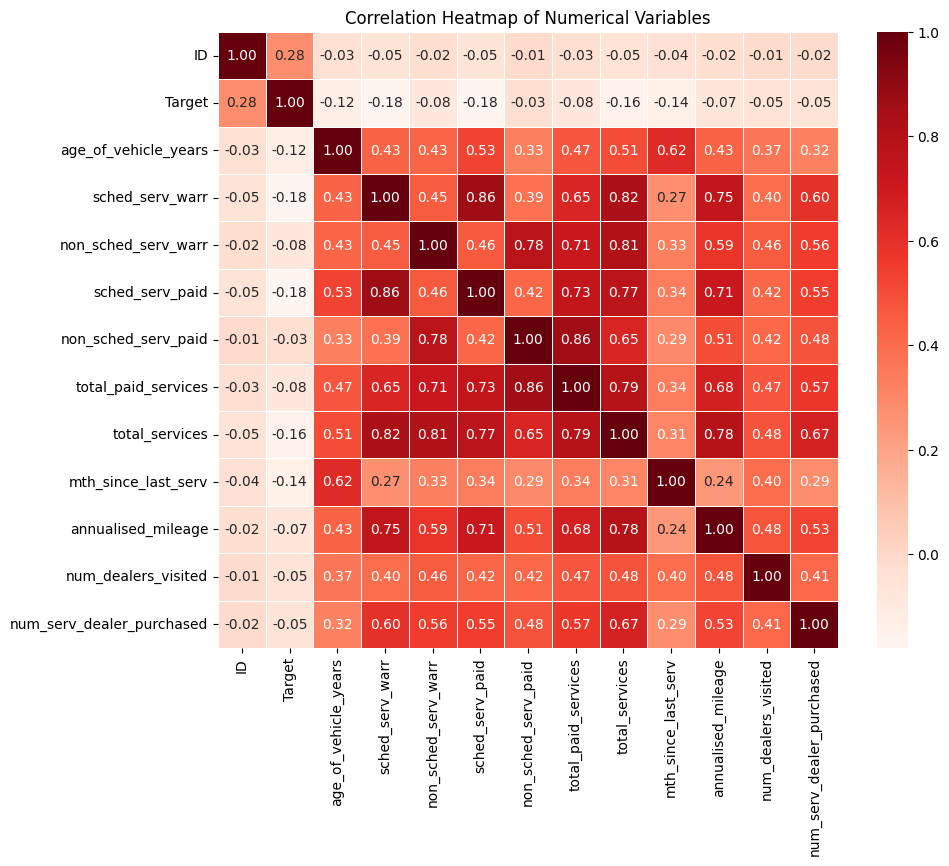

In [25]:
# Distribution of target variable with red color
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=repurchase_df, color='purple')
plt.title('Distribution of Target Variable')
plt.xlabel('Repurchase (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Check if 'service_ratio' column exists before dropping
if 'service_ratio' in repurchase_df.columns:
    repurchase_df.drop('service_ratio', axis=1, inplace=True)

# Boxplot to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=repurchase_df, color='green')
plt.title('Boxplot of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()



# Check if 'service_ratio' column exists before generating the correlation heatmap
if 'service_ratio' in numerical_cols:
    numerical_cols = numerical_cols.drop('service_ratio')

# Correlation heatmap for numerical variables with red color
plt.figure(figsize=(10, 8))
sns.heatmap(repurchase_df[numerical_cols].corr(), annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()





# **SVM classifier**

In [26]:
# Select relevant features and target variable
X = repurchase_df[['age_band', 'car_segment', 'annualised_mileage', 'num_dealers_visited']]
y = repurchase_df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize imputer
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in target variable
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Apply the same imputation to the test set
y_test_imputed = imputer.transform(y_test.values.reshape(-1, 1)).ravel()

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_imputed)
y_test_encoded = label_encoder.transform(y_test_imputed)

# Initialize SVM classifier
svm_clf = SVC(kernel='linear')

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])

svm_clf = SVC()

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Train the classifier
svm_clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test_scaled)

# Make predictions
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9748743718592965
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     25608
           1       0.00      0.00      0.00       660

    accuracy                           0.97     26268
   macro avg       0.49      0.50      0.49     26268
weighted avg       0.95      0.97      0.96     26268

Confusion Matrix:
[[25608     0]
 [  660     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


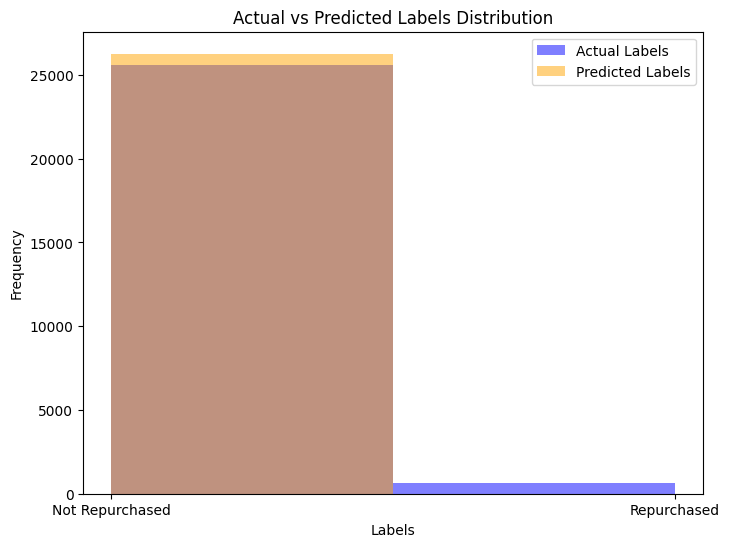

In [30]:
# Plotting the histogram
plt.figure(figsize=(8, 6))

# Actual labels histogram
plt.hist(y_test, bins=[0, 0.5, 1], alpha=0.5, color='blue', label='Actual Labels')

# Predicted labels histogram
plt.hist(y_pred, bins=[0, 0.5, 1], alpha=0.5, color='orange', label='Predicted Labels')

plt.title('Actual vs Predicted Labels Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(np.arange(2), labels=['Not Repurchased', 'Repurchased'])
plt.legend()
plt.show()
